Importing essential libraries

In [166]:
import pandas as pd
import numpy as np

# PCA

## Data Preprocessing

In [167]:
input_df = pd.read_csv("hw1_input.csv")


Normalization of the input data

In [168]:
from sklearn.preprocessing import StandardScaler

x = input_df.values
x_normalized = StandardScaler().fit_transform(x)


Control of the mean and standard deviation of normalized data

In [169]:
np.mean(x_normalized), np.std(x_normalized)

(np.float64(-3.858909780987557e-17), np.float64(1.0))

## PCA

In [170]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_normalized)
explained_variance = pca.explained_variance_ratio_

In [171]:
print('Explained variation per principal component: {}'.format(explained_variance))


Explained variation per principal component: [0.20715348 0.11070825]


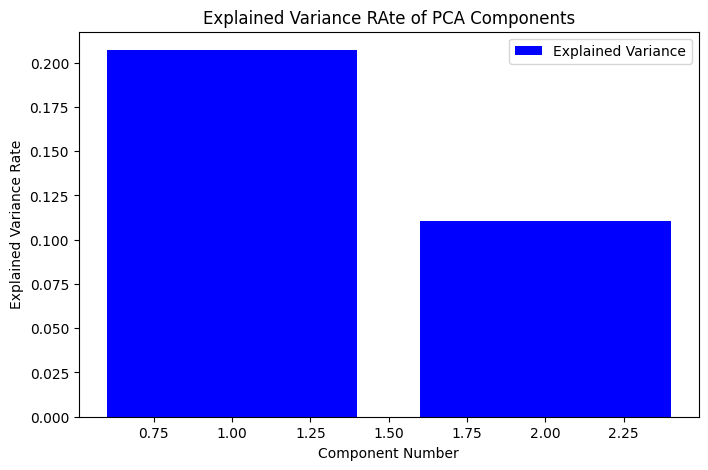

In [172]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='b', label='Explained Variance')
# plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', color='r', label='Kümülatif Açıklanan Varyans')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Rate')
plt.title('Explained Variance RAte of PCA Components')
plt.legend()
plt.show()

Variation explained by principal components is seen above and these values are so low; therefore, we will increase the component number.

In [173]:
pca_2 = PCA(n_components=11)
principalComponents_2 = pca_2.fit_transform(x_normalized)
explained_variance_2 = pca_2.explained_variance_ratio_

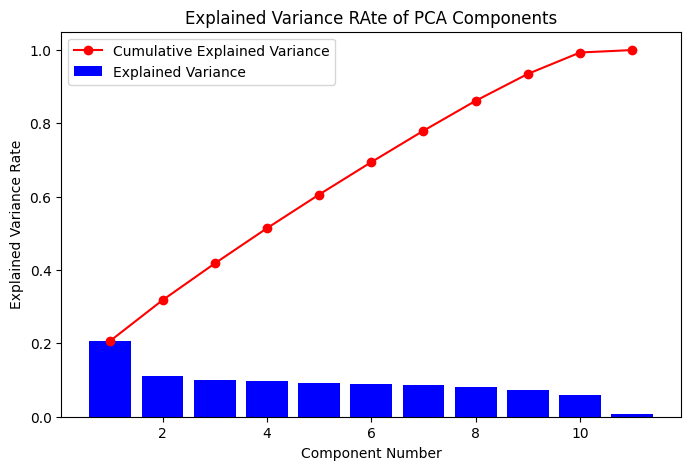

Explained variation per principal component: [0.20715348 0.31786173 0.41789557 0.51396794 0.60583873 0.69429699
 0.77995603 0.86160656 0.93500519 0.99330787 1.        ]


In [174]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_2) + 1), explained_variance_2, color='b', label='Explained Variance')
plt.plot(range(1, len(explained_variance_2) + 1), np.cumsum(explained_variance_2), marker='o', color='r', label='Cumulative Explained Variance')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Rate')
plt.title('Explained Variance RAte of PCA Components')
plt.legend()
plt.show()
print('Explained variation per principal component: {}'.format(np.cumsum(explained_variance_2)))

The dimension of the data could not be reduced effectively by PCA because there is no component that explained variance very well. If we want to use these components, we may use first 8 components because these components explain %86 of variance.

New version of data consists of 8 components

In [175]:
pca_3 = PCA(n_components=8)
principalComponents_3 = pca_3.fit_transform(x_normalized)
explained_variance_3 = pca_3.explained_variance_ratio_
explained_variance_3

array([0.20715348, 0.11070825, 0.10003384, 0.09607237, 0.09187079,
       0.08845826, 0.08565904, 0.08165053])

In [176]:
data=pca_3.components_
feature_PCA=pd.DataFrame(data=data.T)
feature_PCA.columns = ['PCA' + str(i+1) for i in range(len(explained_variance_3))]
feature_PCA.set_index(input_df.columns, inplace=True)
feature_PCA

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
length of patch,-0.101327,0.315409,-0.369645,0.376883,0.409833,0.073314,-0.253331,0.454266
width of patch,0.624178,-0.009718,0.040766,0.039631,0.012169,-0.032326,0.000413,0.022090
height of patch,0.071054,0.055716,0.620460,0.392974,0.017701,0.069714,-0.490098,-0.317943
height of substrate,0.624137,0.018824,0.016441,0.076518,0.028012,-0.060565,0.002837,0.059481
height of solder resist layer,-0.021049,0.266259,0.086417,0.510652,-0.124629,0.459841,0.647199,-0.110408
radius of the probe,0.025997,0.002815,0.548381,-0.454397,0.218986,0.304908,0.212779,0.491478
c_pad,-0.054228,-0.265990,0.144827,0.177533,0.580059,-0.547579,0.429976,-0.174386
c_antipad,-0.018720,-0.559499,0.088323,0.373926,0.127759,0.172140,-0.138146,0.415883
c_probe,0.039213,0.564753,0.093131,-0.151004,0.487544,0.016285,-0.102528,-0.129279
dielectric constant of substrate,0.445100,-0.012829,-0.256167,-0.022492,0.012254,0.027772,0.097290,0.053226


Above, there are contributions of variables to PCA components.

In [177]:
PCA_columns = ["PCA"+str(i) for i in range(1,9)]
pca_input_df = pd.DataFrame(data = principalComponents_3
             , columns = PCA_columns)

pca_input_df.head(5)
    

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
0,-0.982602,1.004385,-1.516279,-2.104630,-0.546775,0.744702,-0.552818,-0.667340
1,0.248740,-0.141891,0.376193,-0.732142,-0.282065,1.368877,-0.959647,-2.041031
2,1.908395,0.083787,-0.319515,-1.120700,2.071235,-0.491458,-0.492149,-1.244033
3,-1.213149,-1.144310,-2.298673,1.459123,-1.737006,1.587619,0.433061,0.978435
4,-1.651363,0.449599,-0.306939,1.764989,0.852996,-0.355527,1.083428,0.401747


# LINEAR REGRESSION

## DATA PREPERATION

In [178]:
real_df = pd.read_csv("hw1_real.csv")
img_df = pd.read_csv("hw1_img.csv")

The main aim is to predict the magnitude; therefore, real and imaginary parts of data should be converted to magnitude as an only output.

In [179]:
magnitude_df = np.sqrt(real_df**2+img_df**2)
magnitude_df


,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0.781778,0.783440,0.785795,0.788790,0.792359,0.796433,0.800936,0.805793,0.810930,0.816277,...,0.988520,0.988551,0.988581,0.988610,0.988638,0.988664,0.988690,0.988714,0.988737,0.988759
1,0.986860,0.986669,0.986470,0.986263,0.986048,0.985824,0.985592,0.985350,0.985100,0.984839,...,0.945061,0.945880,0.946669,0.947428,0.948158,0.948861,0.949537,0.950188,0.950814,0.951417
2,0.866883,0.865643,0.864258,0.862724,0.861039,0.859198,0.857199,0.855036,0.852705,0.850202,...,0.865665,0.861328,0.856551,0.851268,0.845404,0.838870,0.831564,0.823368,0.814148,0.803752
3,0.995069,0.995055,0.995041,0.995025,0.995009,0.994991,0.994973,0.994953,0.994933,0.994912,...,0.935682,0.932755,0.929637,0.926312,0.922765,0.918978,0.914932,0.910607,0.905982,0.901033
4,0.985009,0.985235,0.985447,0.985645,0.985831,0.986005,0.986169,0.986321,0.986464,0.986597,...,0.988472,0.988418,0.988361,0.988304,0.988244,0.988183,0.988121,0.988057,0.987991,0.987924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0.712967,0.703130,0.692989,0.682545,0.671797,0.660746,0.649395,0.637749,0.625814,0.613598,...,0.675654,0.683714,0.691363,0.698625,0.705520,0.712067,0.718286,0.724194,0.729808,0.735143
381,0.901571,0.894376,0.886417,0.877604,0.867842,0.857028,0.845054,0.831812,0.817200,0.801129,...,0.990712,0.990714,0.990716,0.990716,0.990715,0.990713,0.990710,0.990706,0.990701,0.990695
382,0.985925,0.986114,0.986294,0.986465,0.986629,0.986785,0.986934,0.987076,0.987212,0.987341,...,0.987993,0.987889,0.987783,0.987674,0.987561,0.987445,0.987326,0.987204,0.987078,0.986949
383,0.984282,0.984049,0.983807,0.983558,0.983300,0.983034,0.982758,0.982473,0.982179,0.981875,...,0.911483,0.913052,0.914566,0.916027,0.917439,0.918802,0.920118,0.921390,0.922618,0.923805


In [180]:
import plotly.graph_objects as go

fig = go.Figure()

input = magnitude_df.iloc[:10,:]
x_data=[int(x) for x in input.columns]

for i in range(len(input.index)):
    fig.add_trace(go.Scatter(
        x=x_data,
        y=input.iloc[i].values,
        mode='lines',
        name=str(i)
        ))

fig.update_layout(width=700,height=500)
fig.show()

As above, there are many different frequencies magnitudes are close to zero and some frequencies should be determined to make a model that indicates the importance of variables. In other words, some frequency points will be used instead of analyzing variables at all frequencies. 

In [181]:
magnitude_df.min().sort_values(ascending=True).iloc[:5]

71     0.005621
28     0.008276
27     0.010554
126    0.012866
155    0.015970
dtype: float64

The left side of the data shows which frequencies will be used for the analysis. Also, we will call our PCA components with their features coefficients to analyze our output.

![alt text](image.png)

## DIFFERENT MODELS 

In [182]:
import statsmodels.api as sm
from scipy import stats

input_data=pca_input_df

frequency_list=['71', '28', '27', '126', '155']
output_data=magnitude_df['71']

X2 = sm.add_constant(input_data)
est = sm.OLS(output_data, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                     71   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     76.40
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           4.22e-74
Time:                        18:07:35   Log-Likelihood:                 192.56
No. Observations:                 385   AIC:                            -367.1
Df Residuals:                     376   BIC:                            -331.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8024      0.008    106.038      0.0

The most critical variable is PCA1 in Regression Model at 71-frequency; therefore, we need to examine the loadings of PCA1 but it should be analyzed after all frequencies are modeled.

### MODEL WITH PCA COMPONENTS

In [183]:
for i in frequency_list:
    input_data=pca_input_df
    output_data=magnitude_df[str(i)]

    X2 = sm.add_constant(input_data)
    est = sm.OLS(output_data, X2)
    est2 = est.fit()
    print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     71   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     76.40
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           4.22e-74
Time:                        18:07:35   Log-Likelihood:                 192.56
No. Observations:                 385   AIC:                            -367.1
Df Residuals:                     376   BIC:                            -331.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8024      0.008    106.038      0.0

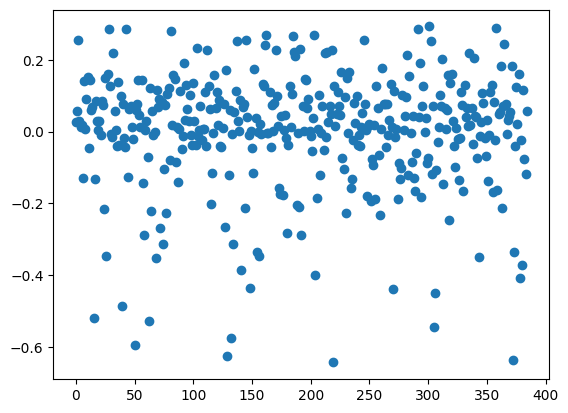

In [184]:
plt.scatter(output_data.index, est2.resid)

The plot of residuals are not seem problematic but we should look at some parameters against to residuals.

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_19856\236962935.py:3: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



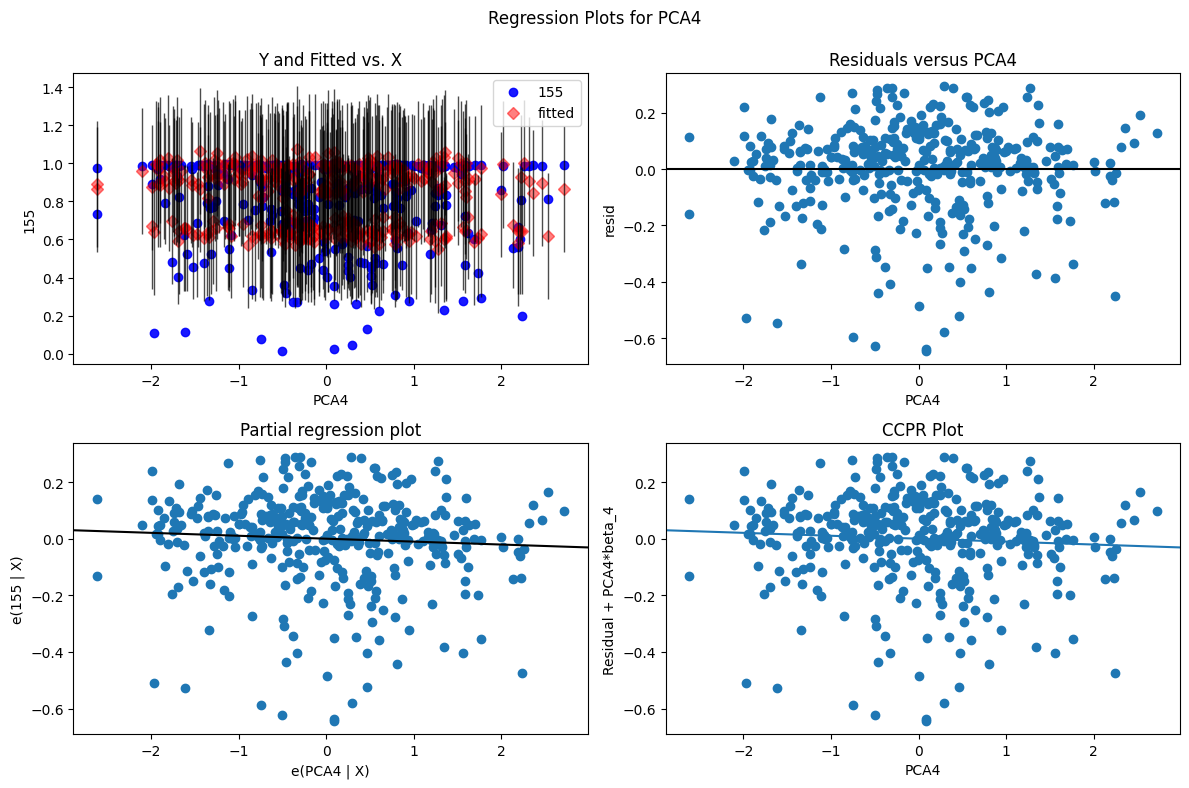

In [185]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(est2, 'PCA4', fig=fig)
fig.show()

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_19856\140417253.py:3: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



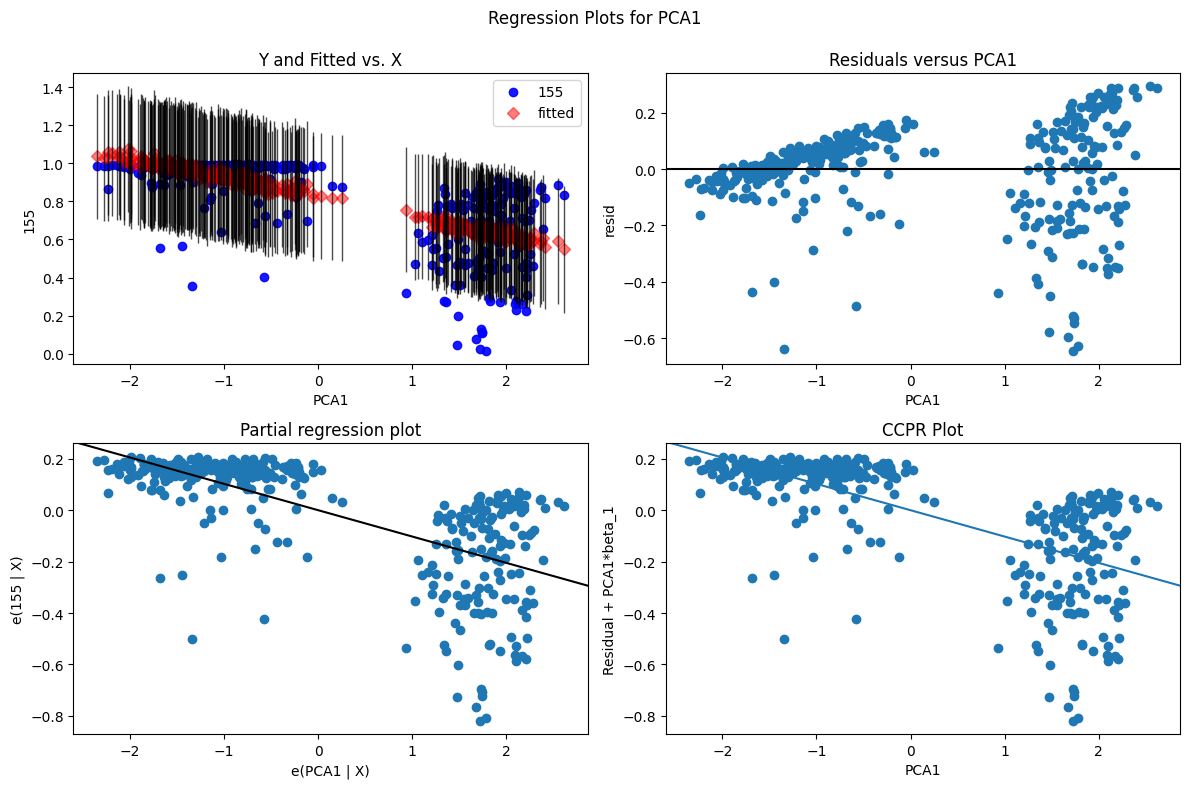

In [186]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(est2, 'PCA1', fig=fig)
fig.show()

PCA4 and others residual plots seem to be nonproblematic but PCA1 residual plot indicates a pattern. It is possibly related to insufficiency of the model.

After analyzing PCA components at the most important frequencies with Linear Regression, PCA1 component is determined as the only important variable because of p-values. Also, the greatest R_squared value is 0.619 at 71-frequency, it shows the models are not very good. 

In [187]:
feature_PCA

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
length of patch,-0.101327,0.315409,-0.369645,0.376883,0.409833,0.073314,-0.253331,0.454266
width of patch,0.624178,-0.009718,0.040766,0.039631,0.012169,-0.032326,0.000413,0.022090
height of patch,0.071054,0.055716,0.620460,0.392974,0.017701,0.069714,-0.490098,-0.317943
height of substrate,0.624137,0.018824,0.016441,0.076518,0.028012,-0.060565,0.002837,0.059481
height of solder resist layer,-0.021049,0.266259,0.086417,0.510652,-0.124629,0.459841,0.647199,-0.110408
radius of the probe,0.025997,0.002815,0.548381,-0.454397,0.218986,0.304908,0.212779,0.491478
c_pad,-0.054228,-0.265990,0.144827,0.177533,0.580059,-0.547579,0.429976,-0.174386
c_antipad,-0.018720,-0.559499,0.088323,0.373926,0.127759,0.172140,-0.138146,0.415883
c_probe,0.039213,0.564753,0.093131,-0.151004,0.487544,0.016285,-0.102528,-0.129279
dielectric constant of substrate,0.445100,-0.012829,-0.256167,-0.022492,0.012254,0.027772,0.097290,0.053226


The most and only significant variable is PCA1 and its components are above. Variables mostly affect PCA1 are 'width of patch', 'height of substrate' and 'dielectric constant of substrate';therefore, we need to reduce them as much as possible to get a lower magnitude.

### MODEL WITH ORIGINAL VARIABLES

Our PCA components are 8 and our variables 11, it shows PCA does not create a significant change in reducing complexity of the model. Therefore, models will be created with original variables and try to increase R_squared values. 

In [188]:
for i in frequency_list:
    output_data=magnitude_df[str(i)]

    #input_df consists of original variable values
    X2 = sm.add_constant(input_df)
    est = sm.OLS(output_data, X2)
    est3 = est.fit()
    print(est3.summary())

                            OLS Regression Results                            
Dep. Variable:                     71   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     57.78
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.16e-73
Time:                        18:07:36   Log-Likelihood:                 198.22
No. Observations:                 385   AIC:                            -372.4
Df Residuals:                     373   BIC:                            -325.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

Any significant changes in R_squared are not observed when models are created with original variables, but the important variables are determined as 'width of patch', 'height of substrate' and 'dielectric constant of substrate'. As a result, all three variables should be low for reducing the magnitude.

# MODEL PERFORMANCE AND INTERPRETABILITY

PCA does not reduce so much complexity; therefore, it is not so useful in this case. The variance explained by the first component is 0.2 and by other many components are 0.1. These values are not very good. Instead of PCA, there are many methods are used like Linear Discriminant Analysis, Independent Component Analysis and so on. 

Multiple Linear Regression may not be fit the data and another model may be used instead of it because R_square of our model are maximuum 0.63 at 71-frequency. The main reason of that may be nonlinear relationship between input variables and output variables. Models can be used instead of MLR are Polynomial Regression and other regression models.

Instead of using PCA and MLR, we may use Ridge Regression because it reduces multicollinearity itself. There is no need to data preprocess in this model. 

Other than that, there may be critical values in some inputs and we cannot capture them. We may use regression trees to capture these critical values as benchmarks. These benchmarks gives us the values of inputs that we will use in designing the electromagnetic simulations.